# Set Up

In [85]:
import pandas as pd
from time import time
import datetime
import matplotlib.pyplot as plt

## Sklearn stufff

### Pre Processing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### modeling

In [58]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# EDA

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?


In [4]:
df = pd.read_json('ultimate_data_challenge.json')

In [5]:
df.shape

(50000, 12)

In [6]:
df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [10]:
#To datetime
df.sign_up_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

<ipython-input-10-662721f71870>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sign_up_date = pd.to_datetime(df.signup_date)


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?


# Feature Engineering

In [11]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

Account Age

In [12]:
# add target variable 
# make column to represent whether or not a user has been active in the last 30 days (from June 1 to July 1) since the data was pulled


latest_date = df['last_trip_date'].max()

df['active'] = df['last_trip_date'].apply(lambda x: 1 if ((latest_date - x)< datetime.timedelta(days=31))  else 0)


## Imputation

In [13]:
df.avg_rating_of_driver.isnull().sum()

8122

In [14]:
df.avg_rating_of_driver.describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [15]:
df.avg_rating_of_driver.value_counts()

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

We've got mostly 5.0 values, with a slightly lower mean. I don't want to just use the mean, so I'm gonna impute with the most recent value, shouldn't skew our data too much

In [16]:
df.avg_rating_of_driver.fillna(method='ffill', inplace=True)

We have such a small number of nulls for rating by driver, I'm gonna go ahead and just drop those.

In [17]:
df.avg_rating_by_driver.isnull().sum()

201

In [18]:
df.dropna(inplace=True, axis='rows')

# Pre Processing

## correct datatypes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49406 non-null  object        
 1   trips_in_first_30_days  49406 non-null  int64         
 2   signup_date             49406 non-null  object        
 3   avg_rating_of_driver    49406 non-null  float64       
 4   avg_surge               49406 non-null  float64       
 5   last_trip_date          49406 non-null  datetime64[ns]
 6   phone                   49406 non-null  object        
 7   surge_pct               49406 non-null  float64       
 8   ultimate_black_user     49406 non-null  bool          
 9   weekday_pct             49406 non-null  float64       
 10  avg_dist                49406 non-null  float64       
 11  avg_rating_by_driver    49406 non-null  float64       
 12  active                  49406 non-null  int64 

In [20]:
#This gets messed with in later steps and doesn't require any additional processing, so we're going just pull it out right away
y = df.active

In [21]:
# Phone numbers are more or less a unique user id, and everyone is already in their own row.
#I don't think we care when last_trip_date is either. It was just useful for setting up our target variable
df.drop(columns=['phone','last_trip_date', 'active'], inplace=True)

## Dummy_encode

In [22]:
#Get our list of columns to encode
dummy_columns = ['city', 'signup_date','ultimate_black_user',]

In [23]:
#yank out our columns
df_to_dummy = df[dummy_columns]

In [24]:
df_to_dummy.shape

(49406, 3)

In [25]:
#turn them into dummies
dummy_df = pd.get_dummies(df_to_dummy)

In [26]:
dummy_df.shape

(49406, 35)

## normalize/scale

In [27]:
#Get rid of dummied columns so they don't get transformed
df_to_normalize = df.drop(columns=dummy_columns)

In [28]:
#instantiate the Scaler
scaler = StandardScaler()

In [29]:
#Scale the stuff!
normalize_array = scaler.fit_transform(df_to_normalize)

In [30]:
#Transform the array back into a dataframe with column names for easy manipulation
normalized_df = pd.DataFrame(normalize_array, columns = df_to_normalize.columns)

In [31]:
normalized_df.shape

(49406, 7)

## Rejoin normalize/dummied code

In [32]:
processed_df = normalized_df.join(dummy_df, on=df.index)

## train test split

In [35]:
X = processed_df
#This is done earlier in the notebook, but I at least want to note it here
#y = processed_df.active

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Modeling

In [37]:
#params for gridseach to explore
param_grid = {'n_estimators' : [10, 50, 100], 'max_depth' : [1,2,3]}

In [38]:
#Instantiate the modeling agent
tree_friend = RandomForestClassifier()

In [39]:
#Instantiate the gridsearch cross validator agent
clf = GridSearchCV(tree_friend, param_grid)

In [40]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'n_estimators': [10, 50, 100]})

In [49]:
clf.cv_results_['param_max_depth']

masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object)

In [50]:
#Check out what parametersit liked best.
clf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [60]:
#Before we check in on the score for our actual model, let's see how a stratified dummy classfier does. This can fil in for our
# random choice, or guessing model.
dumbotron = DummyClassifier(strategy='stratified')
dumbotron.fit(X_train, y_train)
dumbotron.score(X_test, y_test)

0.5306059862610403

In [61]:
#Not the most accurate model, but it's almost certainely way better than our dummy classfier
clf.score(X_test, y_test)

0.730679587831207

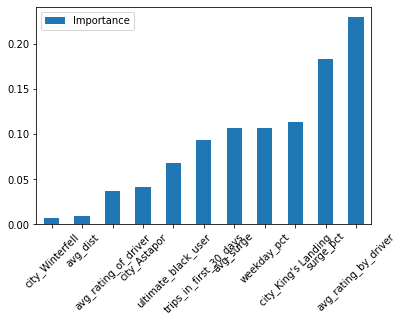

<Figure size 1440x720 with 0 Axes>

In [96]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

importances.head(11).sort_values(by='Importance').plot(kind='bar', rot=45, )


#The sign up date features are dropped in the above code, as there's 31 of them and as a whole they add up to less than one 
#percent of the total feature value

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.


Accuracy/confusion matrix

# Conclusion

The rating by the driver is the most important feature, so it suggests that some kind driver empowerment angle could be useful. The relatinoship between drivers and riders is clearly very important. The second most important feature is the amount of surge pricing they've participated in. The less price sensitive customers are those who tend to stick around longer, in addition to that the fourth most important feature is the percentage of activity that takes place during the week. Both of these features combined suggest to me that habit formation is a key part of long term adoption. This suggests to me that the on-ramp could be made longer, smoother and gentler.

The kings landing one is a lot less clear to me. I don't know anything about the city, I would definitely suggest further investigation of the traits of the city and see if we can't find what traits are correlating with higher rider retention. Another lign of investigation to do.

Lots more that could be done, but here we have a moderately accurate model that opens up several further avenues of investigation and even as it stands suggests some activity pathways.

